# Observations and Insights 


1. **Capomulin and Ramication tumor volume measurements** have the lowest variablity from the mean with a standard deviation of 4.99 and and 4.85 respectively.  This would indicate that the tumor volumes are changing at a slower steady pace.  Which is also evident when inspecting box and whisker charts as boxes are os tall. Ramicance mean line is right in th4e middle of the box suggesting the data points are uniformly distributed. 
2. **Line graph of tumor volume versus time for mouse treated with Capomulin.** Specimen kg403 was selected from the top of the list.  the plotted line indicates an inverse relationship between tumor volume and time, so the tumor is shrinking as time advances.  Also, the chart plotted is linear, which supports the the above observation that the volums are most likely changing at a steady pace.
3.**Strong correlation between average tumor volume and mouse weight for mice treated with Campomulin**.  The entire populaton of mice treated with Capomulin data points consisting of tumor size and weight were passed into the scipy lineregress function.  A Pearson R value of .71 was generated suggesting a strong correlation between tumor volume and mouse weight.  The scatter plot line graph shows the two values are directly proportional, which is supported by the positive slope value returned by the lineregress function (.74)
4. Besides the duplicates the table is very clean  Only one outlier was identified in the four regimens analyed. Infubinol, had one value with a tumor volume of 36.32.  The lower bound was 36.83 




# Data Cleanup

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,how="inner",on='Mouse ID')
# Display the data table for preview
combined_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [2]:
# Checking the number of mice.
print("Mice in study: " + str(len(combined_df["Mouse ID"].unique())))

Mice in study: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse_int_group = combined_df.groupby(["Mouse ID","Timepoint"])
#mouse_int_count = mouse_int_group["Sex"].count().reset_index()
#mouse_int_count = mouse_int_count.rename(columns = {"Sex":"Count"})
#mouse_int_dups = mouse_int_count.loc[mouse_int_count["Count"] > 1,:]
#duplicate_test_intervals = pd.merge(dfcombined,mouse_int_dups,on=("Mouse ID","Timepoint"))
#duplicate_test_intervals

combined_df["IsDuplicate"] = combined_df.duplicated(subset=["Mouse ID",
                                                            "Timepoint"],
                                                    keep=False)
#create series of duplicate mice
duplicate_mice = combined_df[combined_df["IsDuplicate"] == True]["Mouse ID"].unique()
print(f"The following are the duplicate mice ID's")
for x in duplicate_mice:
    print(f"{x}")




The following are the duplicate mice ID's
g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_data_df = combined_df[combined_df["IsDuplicate"] == True]

duplicate_mice_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,IsDuplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = combined_df.drop(index="Mice ID",)
clean_df = combined_df.copy().set_index("Mouse ID")
clean_df = clean_df.drop(duplicate_mice)



In [6]:
# Checking the number of mice in the clean DataFrame.
print("Unique mice ID's after data cleansing: " + str(len(clean_df.index.unique())))

Unique mice ID's after data cleansing: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimine_group = clean_df.groupby(["Drug Regimen"])

regimine_mean = regimine_group["Tumor Volume (mm3)"].mean()
regimine_median = regimine_group["Tumor Volume (mm3)"].median()
regimine_variance = regimine_group["Tumor Volume (mm3)"].var()
regimine_std = regimine_group["Tumor Volume (mm3)"].std()
regimine_sem = regimine_group["Tumor Volume (mm3)"].sem()
regimine_index = [x for x in regimine_group.indices ]

regimine_tumor_vol_df = pd.DataFrame ( index = regimine_index )
regimine_tumor_vol_df["Mean"] = regimine_mean
regimine_tumor_vol_df["Median"] = regimine_median
regimine_tumor_vol_df["Variance"] = regimine_variance
regimine_tumor_vol_df["Standard Deviation"] = regimine_std
regimine_tumor_vol_df["Standard Error Mean"] = regimine_sem

regimine_tumor_vol_df


,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimine_group["Tumor Volume (mm3)"].aggregate([np.mean,np.median,np.var,np.std,st.sem])



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

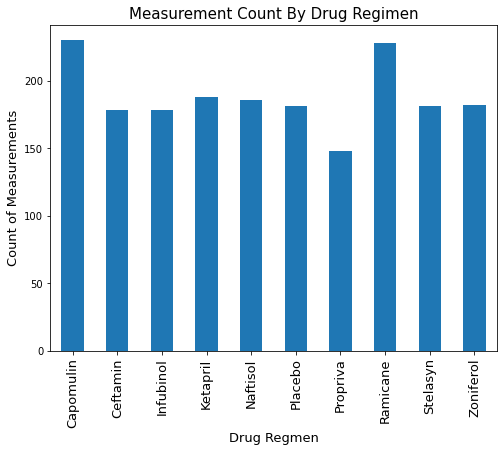

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
df_bar = regimine_group["Drug Regimen"].count()
barchart =  df_bar.plot(kind="bar",figsize=(8,6),ylabel="Count of Measurements",xlabel="Drug Regimen"
                       ,alpha=1)


barchart.set_title("Measurement Count By Drug Regimen" ,fontsize=15)
barchart.set_xlabel("Drug Regmen",fontsize=13)
barchart.set_ylabel("Count of Measurements",fontsize=13)
plt.xticks(rotation=90,fontsize=13)

#plt.tight_layout()
plt.show()


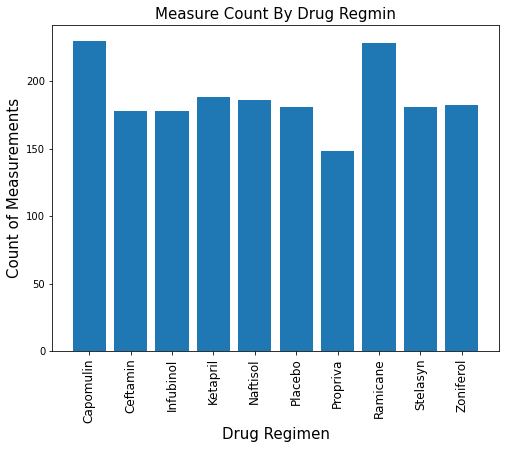

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
data = regimine_group["Drug Regimen"].count()
labels = list(data.keys())
data = list(data)
plt.figure(figsize=(8,6))
plt.bar(labels,data)

plt.title("Measure Count By Drug Regmin",fontsize=15)
plt.ylabel("Count of Measurements",fontsize=15)
plt.xlabel("Drug Regimen", fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.show()

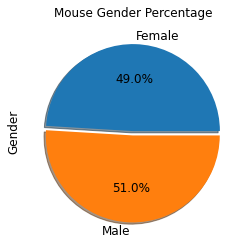

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby(["Sex"])


gender_pie = gender_group["Sex"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,explode=[0,0.05],fontsize=12,title="Mouse Gender Percentage")
gender_pie.set_ylabel("Gender",fontsize=12)

plt.show()





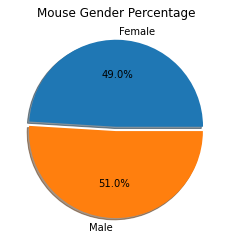

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = list(gender_group["Sex"].count().keys())

plt.pie(gender_group["Sex"].count(),labels=labels,autopct='%1.1f%%',shadow=True,explode=(0.05,0))
plt.title("Mouse Gender Percentage")
plt.show()




## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treat_specific_regimines = clean_df[clean_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
treat_regimines = treat_specific_regimines.groupby(["Mouse ID"])
treat_regimines_df = pd.DataFrame({"Timepoint":treat_regimines["Timepoint"].max() })
max_treatment_df = pd.merge(clean_df,treat_regimines_df,how="inner", on=["Mouse ID","Timepoint"])


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_treatment_df = pd.merge(clean_df,treat_regimines_df,how="inner", on=["Mouse ID","Timepoint"])

max_treatment_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,IsDuplicate
Mouse ID,,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1,False
s185,Capomulin,Female,3,17,45,23.343598,1,False
x401,Capomulin,Female,16,15,45,28.484033,0,False
m601,Capomulin,Male,22,17,45,28.430964,1,False
g791,Ramicane,Male,11,16,45,29.128472,1,False
...,...,...,...,...,...,...,...,...
x822,Ceftamin,Male,3,29,45,61.386660,3,False
y163,Infubinol,Female,17,27,45,67.685569,3,False
y769,Ceftamin,Female,6,27,45,68.594745,4,False


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_label = [x for x in max_treatment_df["Drug Regimen"].unique()]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_Capomulin = max_treatment_df[max_treatment_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"].sort_values().reset_index()
tumor_data_Ramicane = max_treatment_df[max_treatment_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"].sort_values().reset_index()
tumor_data_Infubinol = max_treatment_df[max_treatment_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"].sort_values().reset_index()
tumor_data_Ceftamin = max_treatment_df[max_treatment_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"].sort_values().reset_index()


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_Capomulin = tumor_data_Capomulin.iloc[:,1].quantile([.25,.5,.75])
quartiles_Ramicane = tumor_data_Ramicane.iloc[:,1].quantile([.25,.5,.75])
quartiles_Infubinol = tumor_data_Infubinol.iloc[:,1].quantile([.25,.5,.75])
quartiles_Ceftamin = tumor_data_Ceftamin.iloc[:,1].quantile([.25,.5,.75])

lowerq = quartiles_Capomulin[0.25]
upperq = quartiles_Capomulin[0.75]
iqr = upperq-lowerq
lower_bound_Capomulin = round(lowerq - (1.5*iqr),2)
upper_bound_Capomulin = round(upperq + (1.5*iqr),2)
outliers_Capomulin_upper = max_treatment_df[(max_treatment_df["Drug Regimen"] == "Capomulin") 
                                      & (max_treatment_df["Tumor Volume (mm3)"] > upper_bound_Capomulin)]["Tumor Volume (mm3)"]
outliers_Capomulin_lower = max_treatment_df[(max_treatment_df["Drug Regimen"] == "Capomulin") 
                                          & (max_treatment_df["Tumor Volume (mm3)"] < lower_bound_Capomulin)]["Tumor Volume (mm3)"]
outliers_Capomulin = [] 

for x in outliers_Capomulin_upper:
    outliers_Capomulin.append(round(x,2)) 
for x in outliers_Capomulin_lower:
    outliers_Capomulin.append(round(x,2))


print(f"Capomulin Treatment")
print(f"The lower quartile of tumor volume reatled to Capomulin treatment is: {lowerq}")
print(f"The upper quartile of tumor volume related Capomulin treatment is: {upperq}")
print(f"The interquartile range tumor volume related to Capomulin treatment is: {iqr}")
print(f"The the median of volume  is: {quartiles_Capomulin[0.5]} ")
print(f"Outlier Lower bound {lower_bound_Capomulin}")
print(f"Outlier Lower bound {upper_bound_Capomulin}")
print(f"Potential Outlies {outliers_Capomulin}")
print("\n\n")    



lowerq = quartiles_Ramicane[0.25]
upperq = quartiles_Ramicane[0.75]
iqr = upperq-lowerq
lower_bound_Ramicane = round(lowerq - (1.5*iqr),2)
upper_bound_Ramicane = round(upperq + (1.5*iqr),2)
outliers_Ramicane_upper = max_treatment_df[(max_treatment_df["Drug Regimen"] == "Ramicane") 
                                      & (max_treatment_df["Tumor Volume (mm3)"] > upper_bound_Ramicane)]["Tumor Volume (mm3)"]
outliers_Ramicane_lower = max_treatment_df[(max_treatment_df["Drug Regimen"] == "Ramicane") 
                                          & (max_treatment_df["Tumor Volume (mm3)"] < lower_bound_Ramicane)]["Tumor Volume (mm3)"]
outliers_Ramicane = [] 

for x in outliers_Ramicane_upper:
    outliers_Ramicane.append(round(x,2)) 
for x in outliers_Ramicane_lower:
    print(x)
    outliers_Ramicane.append(round(x,2))

    
print(f"Ramicane Treatment")
print(f"The lower quartile of tumor volume reatled to Ramicane treatment is: {lowerq}")
print(f"The upper quartile of tumor volume related Ramicane treatment is: {upperq}")
print(f"The interquartile range tumor volume related to Ramicane treatment is: {iqr}")
print(f"The the median of volume  is: {quartiles_Ramicane[0.5]} ")
print(f"Outlier Lower bound {lower_bound_Ramicane}")
print(f"Outlier Lower bound {upper_bound_Ramicane}")
print(f"Potential Outlies {outliers_Ramicane}")
print("\n\n")    

iqr = quartiles_Infubinol[0.75] - quartiles_Infubinol[0.25] 


lowerq = quartiles_Infubinol[0.25]
upperq = quartiles_Infubinol[0.75]
iqr = upperq-lowerq
lower_bound_Infubinol = round(lowerq - (1.5*iqr),2)
upper_bound_Infubinol = round(upperq + (1.5*iqr),2)
outliers_Infubinol_upper = max_treatment_df[(max_treatment_df["Drug Regimen"] == "Infubinol") 
                                      & (max_treatment_df["Tumor Volume (mm3)"] > upper_bound_Infubinol)].reset_index()["Tumor Volume (mm3)"]
outliers_Infubinol_lower = max_treatment_df[(max_treatment_df["Drug Regimen"] == "Infubinol") 
                                          & (max_treatment_df["Tumor Volume (mm3)"] < lower_bound_Infubinol)].reset_index()["Tumor Volume (mm3)"]

outliers_Infubinol = []
for x in outliers_Infubinol_upper:
    outliers_Infubinol.append(round(x,2)) 
for x in outliers_Infubinol_lower:
    outliers_Infubinol.append(round(x,2))


print(f"Infubinol Treatment")
print(f"The lower quartile of tumor volume reatled to Infubinol treatment is: {lowerq}")
print(f"The upper quartile of tumor volume related Infubinol treatment is: {upperq}")
print(f"The interquartile range tumor volume related to Infubinol treatment is: {iqr}")
print(f"The the median of volume  is: {quartiles_Infubinol[0.5]} ")
print(f"Outlier Lower bound {lower_bound_Infubinol}")
print(f"Outlier Lower bound {upper_bound_Infubinol}")
print(f"Potential Outlies {outliers_Infubinol}" )
print("\n\n")    

lower_bound_Ceftamin = quartiles_Ceftamin[0.25] - (1.5 * iqr)
lowerq = quartiles_Ceftamin[0.25]
upperq = quartiles_Ceftamin[0.75]
iqr = upperq-lowerq
lower_bound_Ceftamin = round(lowerq - (1.5*iqr),2)
upper_bound_Ceftamin = round(upperq + (1.5*iqr),2)
outliers_Ceftamin_upper = max_treatment_df[(max_treatment_df["Drug Regimen"] == "Ceftamin") 
                                      & (max_treatment_df["Tumor Volume (mm3)"] > upper_bound_Ceftamin)]["Tumor Volume (mm3)"]
outliers_Ceftamin_lower = max_treatment_df[(max_treatment_df["Drug Regimen"] == "Ceftamin") 
                                          & (max_treatment_df["Tumor Volume (mm3)"] < lower_bound_Ceftamin)]["Tumor Volume (mm3)"]


outliers_Ceftamin = []
for x in outliers_Ceftamin_upper:
    outliers_Ceftamin.append(round(x,2)) 
for x in outliers_Ceftamin_lower:
    outliers_Ceftamin.append(round(x,2))

print(f"Ceftamin Treatment")
print(f"The lower quartile of tumor volume reatled to Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of tumor volume related Ceftamin treatment is: {upperq}")
print(f"The interquartile range tumor volume related to Ceftamin treatment is: {iqr}")
print(f"The the median of volume  is: {quartiles_Ceftamin[0.5]} ")
print(f"Outlier Lower bound {lower_bound_Ceftamin}")
print(f"Outlier Lower bound {upper_bound_Ceftamin}")
print(f"Potential Outlies {outliers_Ceftamin}")
print("\n\n")    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

Capomulin Treatment
The lower quartile of tumor volume reatled to Capomulin treatment is: 32.37735684
The upper quartile of tumor volume related Capomulin treatment is: 40.1592203
The interquartile range tumor volume related to Capomulin treatment is: 7.781863460000004
The the median of volume  is: 38.125164399999996 
Outlier Lower bound 20.7
Outlier Lower bound 51.83
Potential Outlies []



Ramicane Treatment
The lower quartile of tumor volume reatled to Ramicane treatment is: 31.56046955
The upper quartile of tumor volume related Ramicane treatment is: 40.65900627
The interquartile range tumor volume related to Ramicane treatment is: 9.098536719999998
The the median of volume  is: 36.56165229 
Outlier Lower bound 17.91
Outlier Lower bound 54.31
Potential Outlies []



Infubinol Treatment
The lower quartile of tumor volume reatled to Infubinol treatment is: 54.04860769
The upper quartile of tumor volume related Infubinol treatment is: 65.52574285
The interquartile range tumor volume r

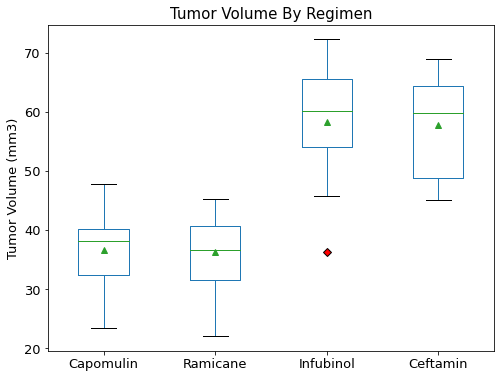

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#data = [tumor_data_Capomulin,quartiles_Ramicane,quartiles_Infubinol,tumor_data_Ceftamin]]


campomulin_series = [x for x in tumor_data_Capomulin["Tumor Volume (mm3)"]]
ramicane_series = [x for x in tumor_data_Ramicane["Tumor Volume (mm3)"]]
infubinol_series = [x for x in tumor_data_Infubinol["Tumor Volume (mm3)"]]
ceftamin_series = [x for x in tumor_data_Ceftamin["Tumor Volume (mm3)"]]

box_df = pd.DataFrame({"Capomulin":campomulin_series,
                       "Ramicane":ramicane_series,
                       "Infubinol":infubinol_series,
                       "Ceftamin":ceftamin_series
                       })


red_diamond = dict(markerfacecolor='r', marker='D')
box_df.plot.box(showmeans=True, 
                figsize=(8,6), flierprops=red_diamond)                                         
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y',labelsize=13)
plt.ylabel("Tumor Volume (mm3)",fontsize=13)
plt.title("Tumor Volume By Regimen",fontsize=15)
plt.show()





## Line and Scatter Plots

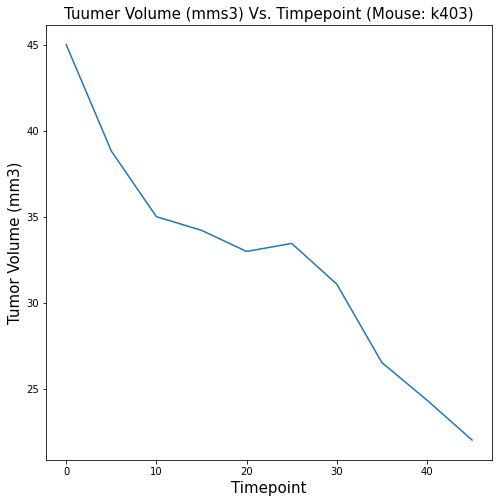

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
reduced_df = clean_df.loc["k403"][["Tumor Volume (mm3)","Timepoint"]]
vals = [x for x in reduced_df["Tumor Volume (mm3)"]]
labels = [x for x in reduced_df["Timepoint"] ]

plt.figure(figsize=(8,8))
plt.ylabel("Tumor Volume (mm3)",fontsize=15)
plt.xlabel("Timepoint",fontsize=15)
plt.title("Tuumer Volume (mms3) Vs. Timpepoint (Mouse: k403)",fontsize=15)
plt.plot(labels, vals)


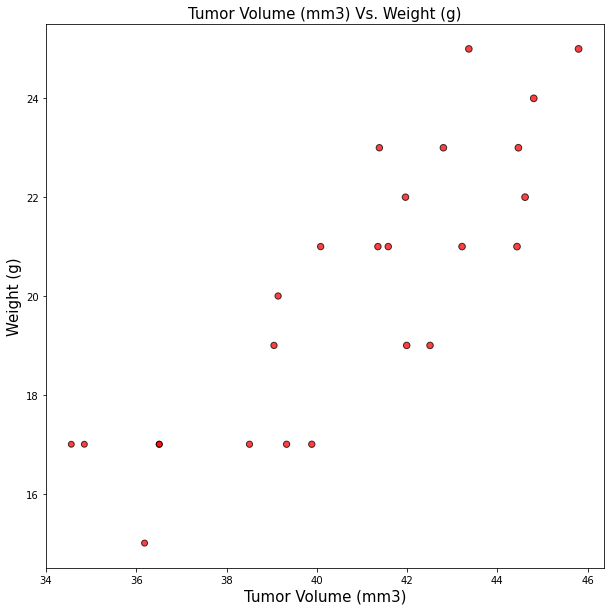

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Follwoing command get's mouse average tumor volume for all measurements.  Weight is also captured from metadata data frame

capomulin_df = pd.DataFrame(clean_df[clean_df["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index())

#plot tumor volume size in x axis since controls size.
x_axis = capomulin_df["Tumor Volume (mm3)"]
data = capomulin_df["Weight (g)"]
plt.figure(figsize=(10,10))
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
           s=x_axis, alpha=0.75)
plt.xlabel("Tumor Volume (mm3)",fontsize=15)
plt.ylabel("Weight (g)",fontsize=15)
plt.title("Tumor Volume (mm3) Vs. Weight (g)",fontsize=15)

plt.show()
#capomulin_df.plot(kind="scatter",x="Tumor Volume (mm3)", y="Weight (g)",grid=True, figsize=(8,8),
#                  title="Tumor Volume (mm3) Vs. Weight (g)",c="r")




## Correlation and Regression

The r-squared is: 0.7088568047708717
0.7426941826944178


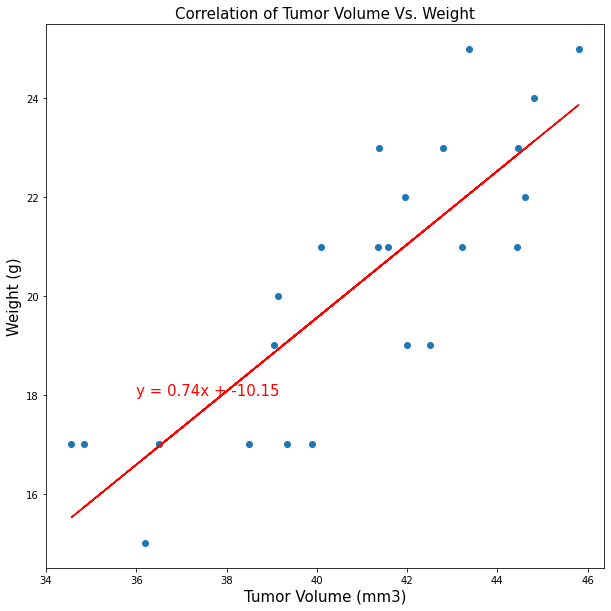

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_df["Tumor Volume (mm3)"]
y_values = capomulin_df["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(36,18),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)',fontsize=15)
plt.ylabel('Weight (g)',fontsize=15)
plt.title("Correlation of Tumor Volume Vs. Weight",fontsize=15)
print(f"The r-squared is: {rvalue**2}")
print(slope)
plt.show()